<IPython.core.display.Javascript object>


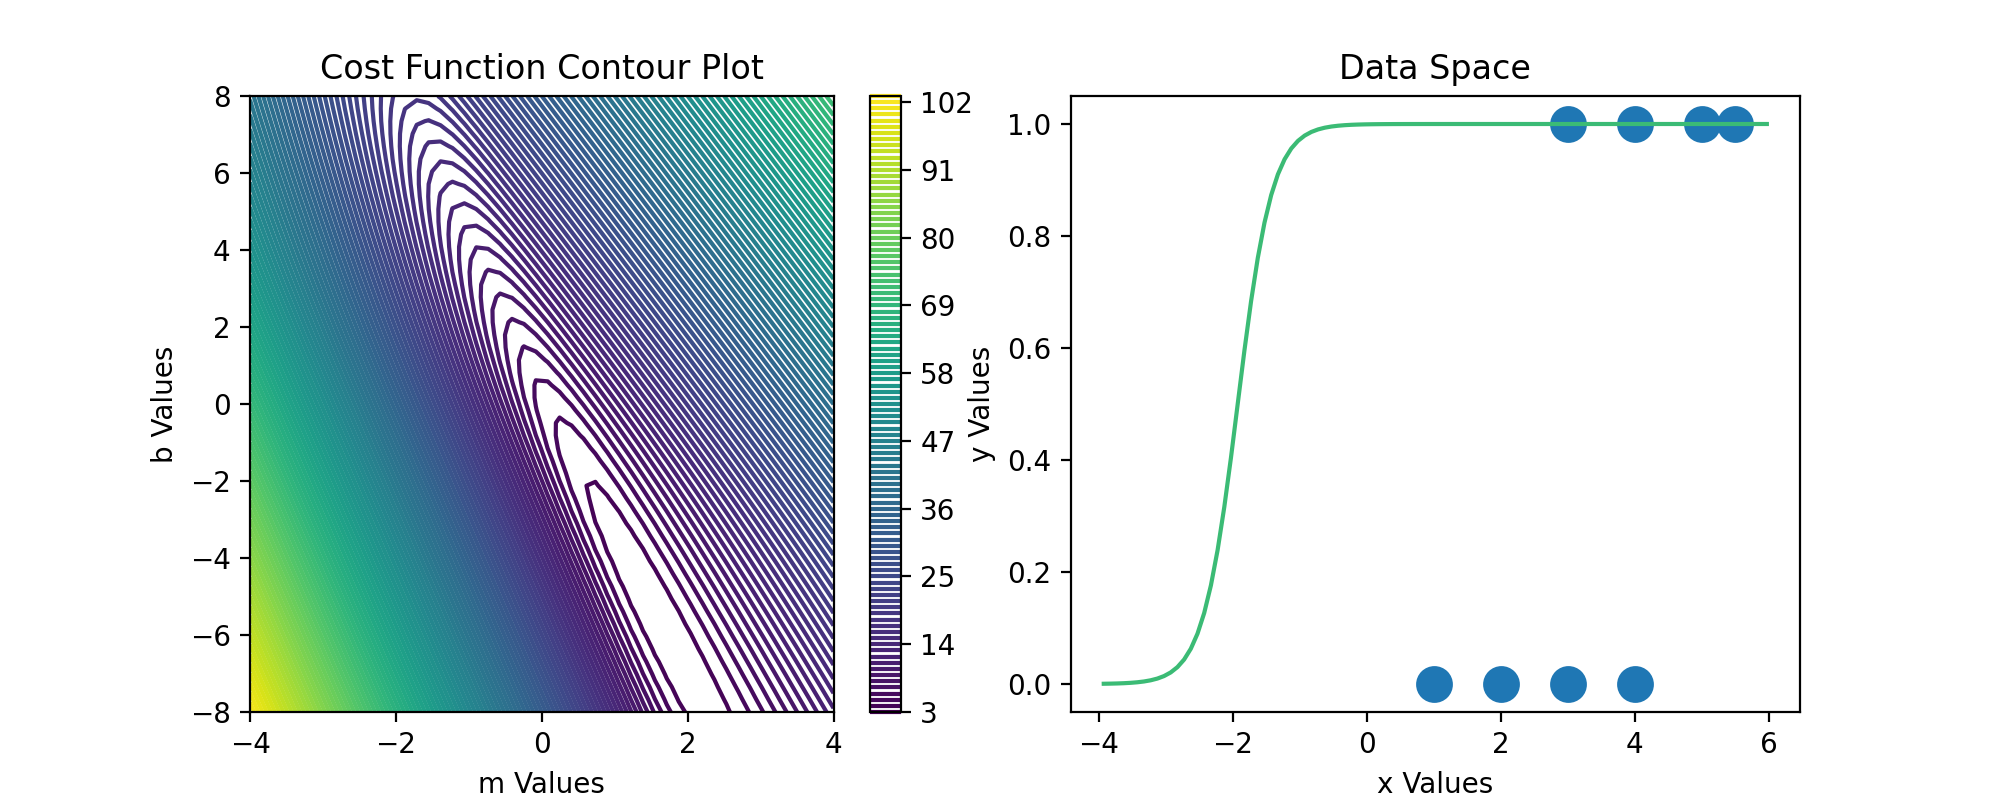

In [2]:
"""
File: interactive_logistic_curve_revised.py
Author: Emma Tao
Date: 19 November 2024
Description: Visualize how the logistic curve changes as one moves in parameter space
"""

%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Create 2 plots in 1x2 array
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.125)

# Create a grid of x and y values
m = np.linspace(-4, 4, 50)
b = np.linspace(-8, 8, 50)
M, B = np.meshgrid(m, b)

X, y = [1, 2, 3, 3, 4, 4, 5, 5.5], [0, 0, 0, 1, 0, 1, 1, 1]  # Define the x and y data used

# Create the cost function to plot
cost = 0
for i in range(len(X)):
    cost += -1 * (y[i] * np.log(1 / (1 + np.exp(-1 * (M * X[i] + B)))) +
                  (1 - y[i]) * np.log(1 - (1 / (1 + np.exp(-1 * (M * X[i] + B))))))

# Create a contour plot of the cost function
contour = ax[0].contour(M, B, cost, levels=100)
ax[0].set_title('Cost Function Contour Plot')
ax[0].set_xlabel('m Values')
ax[0].set_ylabel('b Values')
plt.colorbar(contour, ax=ax[0])

# Create a scatter plot of the data
ax[1].scatter(X, y, s=150)
ax[1].set_title('Data Space')
ax[1].set_xlabel('x Values')
ax[1].set_ylabel('y Values')

# Function to get the color of the closest contour line
def get_contour_color(x, y, contour):
    # Find the closest contour level
    levels = contour.levels
    closest_level = min(levels, key=lambda l: abs(l - cost[int((y + 8) / (16 / 50)), int((x + 4) / (8 / 50))])) # Return level curve with value closest to cost at mouse position
    
    # Get the color of the corresponding contour line
    for collection, level in zip(contour.collections, levels): # Look for the pair of line in collections and level in levels where level is the closest level
        if level == closest_level:
            return collection.get_edgecolor()[0] # Get the color of the line corresponding to the closest level
    return 'black'  # Fallback color if no match

# Draw a logistic curve in the data space graph when the mouse moves in parameter space
def on_move(event):
    if event.inaxes == ax[0]:
        ax[1].clear()  # Clear the graph each time, so that the logistic curves do not build up on each other
        ax[1].scatter(X, y, s=150)
        ax[1].set_title('Data Space')
        ax[1].set_xlabel('x Values')
        ax[1].set_ylabel('y Values')
        
        m_red, b_red = event.xdata, event.ydata

        # Change range of graph based on x value where y = 1/2
        x_center = -float(b_red)/float(m_red)
        if x_center > 6 and x_center <= 22:
            x = np.arange(0, x_center + 2, 0.1)
        elif x_center < 0 and x_center >= -16:
            x = np.arange(x_center - 2, 6, 0.1)
        elif x_center > 22:
            x = np.arange(0, 24, 0.1)
        elif x_center < -16:
            x = np.arange(-18, 6, 0.1)
        else:
            x = np.arange(0, 6, 0.1)
        y_red_cla = 1 / (1 + np.exp(-(float(m_red) * x + float(b_red))))
        
        # Get the color of the contour line
        color = get_contour_color(m_red, b_red, contour)
        ax[1].plot(x, y_red_cla, color=color)
        
        plt.draw()  # Redraw the data with the new logistic curve

fig.canvas.mpl_connect('motion_notify_event', on_move)
plt.show()